# Join three time series

The purpose of this test is to join the time series of three consecutive days in case of the ionospheric perturbations were detected near the transition from one day to another (i.e near 0:00 or 24:00 UT) as we found in some cases with the Caribbean meteor. It's in a notebook since we don't know is this is gonna work.

In [30]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

## Test with Caribbean event, BARA station

In [2]:
f = open("./data/2019-06-22/set1/bara173-2019-06-22.Cmn", "r")
pf = open("./data/2019-06-22/set1/previous/bara172-2019-06-21.Cmn", "r")
nf = open("./data/2019-06-22/set1/next/bara174-2019-06-23.Cmn")

In [3]:
f.readline()
f.readline()
f.readline()
f.readline()
raw_data = f.readlines()

In [4]:
data = Table.read(raw_data, format="ascii")
data.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

In [5]:
pf.readline()
pf.readline()
pf.readline()
pf.readline()
P_raw_data = pf.readlines()

In [6]:
p_data = Table.read(P_raw_data, format="ascii")
p_data.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

In [7]:
nf.readline()
nf.readline()
nf.readline()
nf.readline()
n_raw_data = nf.readlines()

In [8]:
n_data = Table.read(n_raw_data, format="ascii")
n_data.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

In [9]:
prn_mask = data["PRN"] ==29
p_prn_mask = p_data["PRN"] ==29
n_prn_mask = n_data["PRN"] ==29

In [10]:
time = data["Time"][prn_mask]
time_corrector = time <0
time[time_corrector] += 24.0 
tec = data["Stec"][prn_mask]
p_time= p_data["Time"][p_prn_mask]
p_time_corrector = p_time < 0
p_time[p_time_corrector] += 24.0
p_time += -24.0
n_time = n_data["Time"][n_prn_mask]
n_time_corrector = n_time < 0
n_time[n_time_corrector] += 24.0
n_time += 24.0
p_tec = p_data["Stec"][p_prn_mask]
n_tec = n_data["Stec"][n_prn_mask]

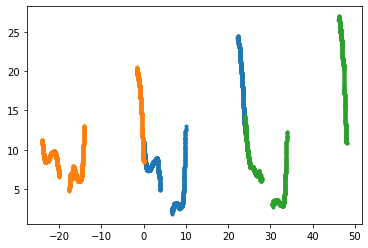

In [11]:
plt.plot(time, tec, ".")
plt.plot(p_time, p_tec, ".")
plt.plot(n_time, n_tec, ".")
start_time = 21 + 25/60. + 48/3600.
time_mask = (time > start_time-1)
n_time_mask = n_time < 2.0

Looks like sometimes join time series from adjacent days works and sometimes it doesn't. More precisely, if the time series lies near the day transition, then it may work.

## Then, what to do?

A good idea is to detrend first all data (event date, previous day and next day), then with the detrended csv files create a new program that joins the event date detrended data with either next or previous day detrended data 

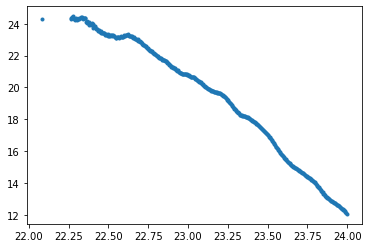

In [12]:
Time = np.concatenate([np.array(time[time_mask]), np.array(n_time[n_time_mask])])
TEC = np.concatenate([np.array(tec[time_mask]), np.array(n_tec[n_time_mask])])
plt.plot(Time, TEC, ".")

## Test with RDAZ station

Looks like this station is messing up with the detrending proccess, let's see what's happening.

In [13]:
f = open("./data/2019-06-22/set1/rdaz173-2019-06-22.Cmn", "r")
pf = open("./data/2019-06-22/set1/previous/rdaz172-2019-06-21.Cmn", "r")
nf = open("./data/2019-06-22/set1/next/rdaz174-2019-06-23.Cmn", "r")

In [14]:
f.readline()
f.readline()
f.readline()
f.readline()
raw_data = f.readlines()

In [15]:
data = Table.read(raw_data, format="ascii")
data.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

In [16]:
pf.readline()
pf.readline()
pf.readline()
pf.readline()
p_raw_data = pf.readlines()

In [17]:
p_data = Table.read(p_raw_data, format="ascii")
p_data.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

In [18]:
nf.readline()
nf.readline()
nf.readline()
nf.readline()
n_raw_data = nf.readlines()

In [19]:
n_data = Table.read(n_raw_data, format="ascii")
n_data.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

In [20]:
prn_mask = data["PRN"] ==30
p_prn_mask = p_data["PRN"] ==30
n_prn_mask = n_data["PRN"] ==30

In [21]:
time = data["Time"][prn_mask]
time_corrector = time <0
time[time_corrector] += 24.0 
tec = data["Stec"][prn_mask]
p_time= p_data["Time"][p_prn_mask]
p_time_corrector = p_time < 0
p_time[p_time_corrector] += 24.0
p_time += -24.0
n_time = n_data["Time"][n_prn_mask]
n_time_corrector = n_time < 0
n_time[n_time_corrector] += 24.0
n_time += 24.0
p_tec = p_data["Stec"][p_prn_mask]
n_tec = n_data["Stec"][n_prn_mask]

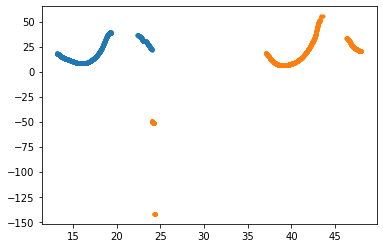

In [22]:
plt.plot(time, tec, ".")
#plt.plot(p_time, p_tec, ".")
plt.plot(n_time, n_tec, ".")
start_time = 21 + 25/60. + 48/3600.
time_mask = (time > start_time-1)
n_time_mask = n_time < 2.0

In [23]:
len(n_time[n_time_mask])

0

looks like when the program tries to detrend the data of the next day of the event it finds an empty array and crashes

In [24]:
a = True
b= False

In [25]:
print(b or b)

False


In [35]:
f= pd.read_csv("./data/2019-06-22/set1/2019-06-22_21.43_detrended-sTEC.csv")
nf = pd.read_csv("./data/2019-06-22/set1/next/2019-06-22_next_detrended-sTEC.csv")

In [32]:
nf.keys()

Index(['Station', 'Time', 'PRN', 'Latitude', 'Longitude', 'sTEC'], dtype='object')

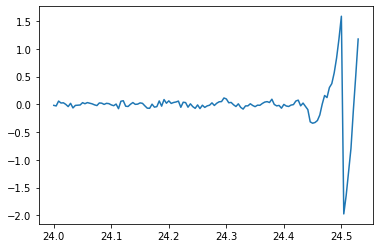

In [40]:
prn_mask = f["PRN"]==6
n_prn_mask = nf["PRN"] ==6
s_mask = nf["Station"] == "bara"
time = f["Time"][prn_mask&s_mask]
tec = f["sTEC"][prn_mask&s_mask]
n_time = nf["Time"][n_prn_mask&s_mask]
n_tec = nf["sTEC"][n_prn_mask&s_mask]
#plt.plot(time, tec)
plt.plot(n_time+24.0, n_tec)

In [44]:
f = open("./data/2019-06-22/set1/bara173-2019-06-22.Cmn", "r")
pf = open("./data/2019-06-22/set1/previous/bara172-2019-06-21.Cmn", "r")
nf = open("./data/2019-06-22/set1/next/bara174-2019-06-23.Cmn", "r")

In [45]:
f.readline()
f.readline()
f.readline()
f.readline()
raw_data = f.readlines()
pf.readline()
pf.readline()
pf.readline()
pf.readline()
p_raw_data = pf.readlines()
nf.readline()
nf.readline()
nf.readline()
nf.readline()
n_raw_data = nf.readlines()

In [46]:
data = Table.read(raw_data, format="ascii")
p_data = Table.read(p_raw_data, format="ascii")
n_data = Table.read(n_raw_data, format="ascii")

In [47]:
prn_mask = data["PRN"] ==6
p_prn_mask = p_data["PRN"] ==6
n_prn_mask = n_data["PRN"] ==6

In [48]:
time = data["Time"][prn_mask]
time_corrector = time <0
time[time_corrector] += 24.0 
tec = data["Stec"][prn_mask]
p_time= p_data["Time"][p_prn_mask]
p_time_corrector = p_time < 0
p_time[p_time_corrector] += 24.0
p_time += -24.0
n_time = n_data["Time"][n_prn_mask]
n_time_corrector = n_time < 0
n_time[n_time_corrector] += 24.0
n_time += 24.0
p_tec = p_data["Stec"][p_prn_mask]
n_tec = n_data["Stec"][n_prn_mask]

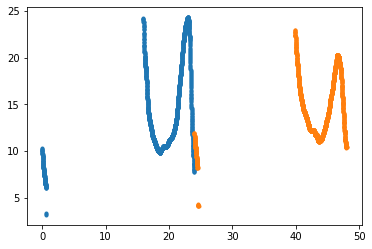

In [49]:
plt.plot(time, tec, ".")
#plt.plot(p_time, p_tec, ".")
plt.plot(n_time, n_tec, ".")
start_time = 21 + 25/60. + 48/3600.
time_mask = (time > start_time-1)
n_time_mask = n_time < 2.0